In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, metrics
import ast
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('prepared_data/back_2_seconds_accelerometer_only.csv')
df = df.drop(df.columns[0], axis=1)
df

,Category,Accelerometer,Duration
0,CLIMBING,"[[0.7330500483512878, 0.4930500090122223, 10.0...",2
1,CLIMBING,"[[-0.3169500231742859, 1.4239500761032104, 12....",2
2,CLIMBING,"[[0.3540000021457672, 3.427950143814087, 9.400...",2
3,CLIMBING,"[[0.2350500077009201, 3.6130502223968506, 8.53...",2
4,CLIMBING,"[[2.2360501289367676, -0.8350500464439392, 9.6...",2
...,...,...,...
207,DOWNTIME,"[[-5.512950420379639, 7.783050537109375, 1.072...",2
208,DOWNTIME,"[[-5.794950485229492, 7.659000396728516, 0.903...",2
209,DOWNTIME,"[[-5.656050205230713, 7.7470502853393555, 0.90...",2
210,DOWNTIME,"[[-5.664000034332275, 7.711050510406494, 0.691...",2


In [68]:
df = df.sample(frac=1)

In [69]:
# Convert string to list of list of floats
df['Accelerometer'] = df['Accelerometer'].apply(eval)
# df['Gyroscope'] = df['Gyroscope'].apply(eval)
# df['Magnetometer'] = df['Magnetometer'].apply(eval)

In [7]:
df['Accelerometer']

194    [[-5.623050212860107, 7.73805046081543, 1.3410...
104    [[-6.624000549316406, -7.266000270843506, 5.22...
12     [[-5.259000301361084, 7.14900016784668, 2.3629...
6      [[0.7060500383377075, 3.0640501976013184, 12.1...
58     [[-3.715050220489502, 6.646050453186035, 4.291...
                             ...                        
149    [[-8.9170503616333, 8.467950820922852, 1.88895...
52     [[-6.556950092315674, 5.26200008392334, -1.119...
114    [[-6.087000370025635, 5.983050346374512, 2.650...
182    [[-5.503050327301025, 7.8100504875183105, 1.41...
2      [[0.3540000021457672, 3.427950143814087, 9.400...
Name: Accelerometer, Length: 212, dtype: object

In [8]:
def check_sublist_lengths(dataframe):
    accelerometer_col = dataframe['Accelerometer']
    for sublist in accelerometer_col:
        for subsublist in sublist:
            if len(subsublist) != 3:
                return False
    return True

In [9]:
print(check_sublist_lengths(df))

True


In [72]:
def remove_rows_by_category(data_frame_input):
    categories_to_remove = ["CLIMBING","FALLING"]
    mask = data_frame_input['Category'].isin(categories_to_remove)
    df_filtered = data_frame_input[~mask]
    return df_filtered

In [73]:
new_df = remove_rows_by_category(df)

In [74]:
new_df

,Category,Accelerometer,Duration
147,WALKING,"[[-6.592950344085693, 8.202000617980957, 0.334...",2
141,WALKING,"[[-6.492000102996826, 7.3999505043029785, 1.95...",2
168,DOWNTIME,"[[-5.059950351715088, 8.01300048828125, 1.7380...",2
181,DOWNTIME,"[[-5.5489501953125, 7.735050201416016, 1.25505...",2
124,WALKING,"[[-2.2330501079559326, 10.170000076293945, 2.5...",2
...,...,...,...
127,WALKING,"[[-6.039000511169434, 8.83395004272461, 1.5450...",2
189,DOWNTIME,"[[-5.319000244140625, 7.896000385284424, 1.317...",2
126,WALKING,"[[-4.537950038909912, 4.884000301361084, 4.594...",2
108,WALKING,"[[-4.129050254821777, 9.403950691223145, 1.614...",2


2 class classification

In [70]:
X_accelerometer = new_df['Accelerometer']

# Convert 'Accelerometer' column to a 2D NumPy array
X = np.array([np.mean(np.array(sample), axis=0) for sample in X_accelerometer])

# Split data into features (X) and labels (y)
y = new_df['Category'].values

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
precision = metrics.Precision()

# Compile and train the model
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1)

Epoch 1/200
84/84 [==============================] - 1s 2ms/step - loss: 0.8259 - accuracy: 0.5131
Epoch 2/200
84/84 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.7833
Epoch 3/200
84/84 [==============================] - 0s 3ms/step - loss: 0.5355 - accuracy: 0.7617
Epoch 4/200
84/84 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7611
Epoch 5/200
84/84 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.6833
Epoch 6/200
84/84 [==============================] - 0s 5ms/step - loss: 0.3682 - accuracy: 0.8625
Epoch 7/200
84/84 [==============================] - 0s 4ms/step - loss: 0.3689 - accuracy: 0.8883
Epoch 8/200
84/84 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8896
Epoch 9/200
84/84 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8652
Epoch 10/200
84/84 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.8635
Epoch 11/

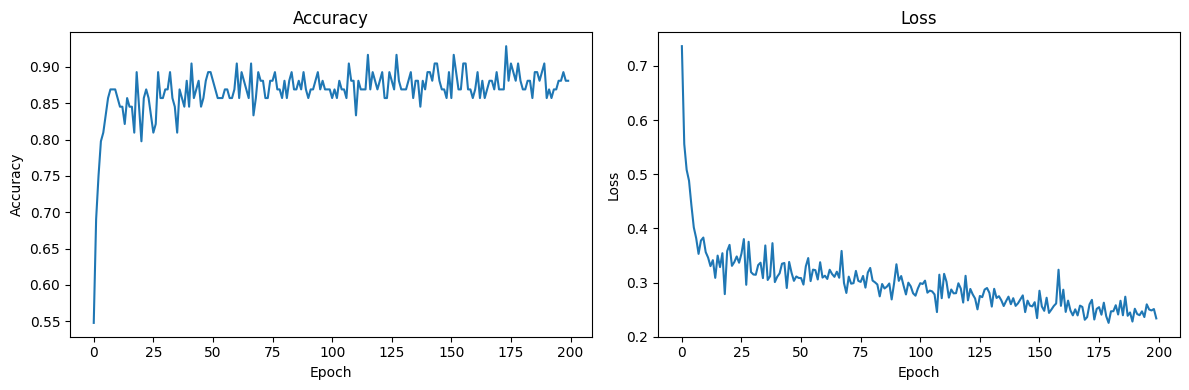

In [66]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

Multi class classification

In [75]:
X_accelerometer = df['Accelerometer']

# Convert 'Accelerometer' column to a 2D NumPy array
X = np.array([np.mean(np.array(sample), axis=0) for sample in X_accelerometer])

# Split data into features (X) and labels (y)
y = df['Category'].values

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])
precision = metrics.Precision()

# Compile and train the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1)

Epoch 1/200
169/169 [==============================] - 1s 2ms/step - loss: 1.4226 - accuracy: 0.4504
Epoch 2/200
169/169 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6897
Epoch 3/200
169/169 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8523
Epoch 4/200
169/169 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8711
Epoch 5/200
169/169 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8713
Epoch 6/200
169/169 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.9182
Epoch 7/200
169/169 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.9047
Epoch 8/200
169/169 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8349
Epoch 9/200
169/169 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9415
Epoch 10/200
169/169 [==============================] - 0s 2ms/step - loss: 0.2133 - accura

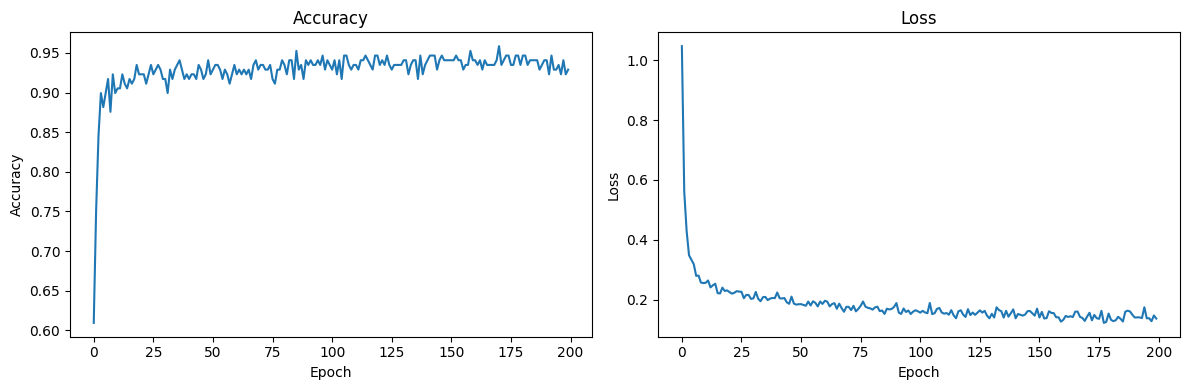

In [80]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [81]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

2/2 [==============================] - 0s 2ms/step - loss: 1.4488 - accuracy: 0.9302
Test Loss: 1.448781967163086
Test Accuracy: 0.930232584476471


<bound method Model.evaluate of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000016A9FE81AF0>>